In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# make a dataset
csvs = ['QCM3.csv', 'QCM6.csv', 'QCM7.csv', 'QCM10.csv', 'QCM12.csv']
path = "../../AI/datasets/QCM Sensor Alcohol Dataset/"
Data = []

for csv in csvs:
    df = pd.read_csv(path + csv, delimiter=";")
    vals = df.values
    for row in vals:
        data = [(row[0] + row[1]) / 2, (row[2] + row[3]) / 2, (row[4] + row[5]) / 2, (row[6] + row[7]) / 2, (row[8] + row[9]) / 2]
        if row[10] == 1:
            Data.append(data + [1])
        if row[11] == 1:
            Data.append(data + [0])
df = pd.DataFrame(Data, columns = ['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4', 'sensor 5', 'drunk or not'])

In [17]:
# Extract X and y data points for different classes
cls1 = df.values[df.values[:, -1] == 1]
X1 = cls1[:, 1]
y1 = cls1[:, 3]
cls2 = df.values[df.values[:, -1] == 0]
X2 = cls2[:, 1]
y2 = cls2[:, 3]
X1 = (X1 - X1.min()) / (X1.max() - X1.min())
y1 = (y1 - y1.min()) / (y1.max() - y1.min())
X2 = (X2 - X2.min()) / (X2.max() - X2.min())
y2 = (y2 - y2.min()) / (y2.max() - y2.min())

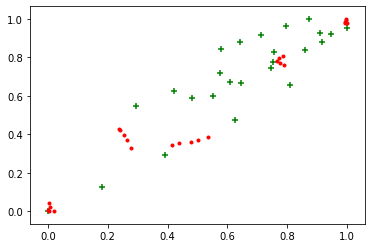

In [18]:
# plot the data
plt.scatter(X1, y1, color = "green", marker='+')
plt.scatter(X2, y2, color = 'red', marker = '.')

In [19]:
# Combine data
X = []
y = []
for (a, b) in zip(X1, y1):
    X.append([a, b])
    y.append(1)
for (a, b) in zip(X2, y2):
    X.append([a, b])
    y.append(0)

In [20]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [21]:
# Create SVM classifier and check the accuracy
model = SVC(kernel="linear", C = 1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.44

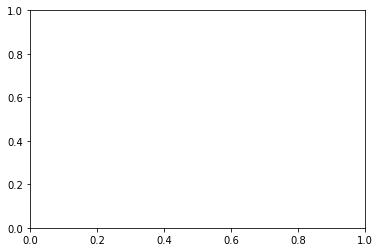

In [22]:
# obtain slope and intercept of hyperplane
Weights=model.coef_[0]
Intercept=model.intercept_
a = -Weights[0]/Weights[1]
b = Intercept[0]/Weights[1]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = a * x_vals - b

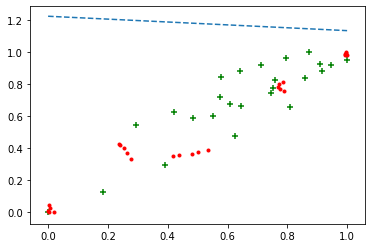

In [23]:
# plot the solution
plt.scatter(X1, y1, color = "green", marker='+')
plt.scatter(X2, y2, color = 'red', marker = '.')
plt.plot(x_vals, y_vals, '--')

In [24]:
# Classification Report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        11
           1       0.00      0.00      0.00        14

    accuracy                           0.44        25
   macro avg       0.22      0.50      0.31        25
weighted avg       0.19      0.44      0.27        25



/Users/kumar/clandestine/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[11  0]
 [14  0]]
